<a href="https://colab.research.google.com/github/matteobalducci/matteobalducci/blob/main/4_16_38_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.16.38 Descriptive Statistics

### A brief history of Statistics

The etymology of the word **statistics** derives from the Italian word "stato" and refers, in almost all European languages, to the observation that the earliest information about real phenomena was collected and organized by the state bodies that were also its main users.

- The use of statistical methods dates back to at least the **5th century BCE**, when early empires often collated *censuses of the population* or recorded the *trade in various commodities* and we can date the earliest writings on statistical inference between the **8th and 13th centuries**, back to Arab mathematicians and cryptographers during the Islamic Golden Age.

    <figure>
    <img src="img/altar-domitius-ahenobarb.jpeg" width="900">
    <figcaption align = "center"> <i>Stages in a census of the Roman citizen body (base of the altar of Domitius Ahenobarbus)</i></figcaption>
    </figure>
- The modern mathematical *theory of probability* has its roots in attempts to analyze games of chance by [Gerolamo Cardano](https://en.wikipedia.org/wiki/Gerolamo_Cardano) in the **16th century**, and by [Pierre de Fermat](https://en.wikipedia.org/wiki/Pierre_de_Fermat), [Blaise Pascal](https://en.wikipedia.org/wiki/Blaise_Pascal) and [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli) in the **17th century**.
    <img src="img/17th-century.png" width="800">
- Thanks to the developments in mathematics and probability theory, the use of statisctics in the modern sense began evolving in the **18th century** in response, among other things, to the novel needs of industrializing sovereign states. There are some particularly noteworthy mentions to be made: [Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes) proved *Bayes' theorem*, Laplace and [Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) discovered the *Normal Distribution* and [William Playfair](https://en.wikipedia.org/wiki/William_Playfair) introduced the idea of *graphical representation* into statistics.
        <figure>
    <img src="img/18th-century.png" width="800">
    <figcaption align = "center"> <i>Thomas Bayes (1701-1761), Carl Gauss (1777-1855) and William Playfair (1759-1823)</i></figcaption>
    </figure>
- The **19th century** saw the discovery of *method of least squares*, which was used to minimize errors in data measurement and is the most used approach to fit data with a *linear regression model*.
        <figure>
    <img src="img/19th-century.png" width="600">
    <figcaption align = "center"> <i></i></figcaption>
    </figure>
- [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) and [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) were the stars of the progress made in the **20th century**, which involved the development of better *design of experiments* models, *hypothesis testing* and techniques for use with small data samples.
        <figure>
    <img src="img/20th-century.png" width="800">
    <figcaption align = "center"> <i>William Sealy Gosset (1876-1937) - Statistician and Brewer</i></figcaption>
    </figure>

Check out [this timeline](https://www.statsref.com/timeline.pdf) for a more detailed account of the historical milestones in statistics.

### Statistics today... or Data Science?

In **1962**, [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) described a field he called *"data analysis"*, which resembles modern data science. In **1985**, in a lecture given to the Chinese Academy of Sciences in Beijing, C. F. Jeff Wu used the term *"data science"* for the first time as an alternative name for statistics.

The modern conception of data science as an independent discipline is sometimes attributed to William S. Cleveland. In a **2001** paper, he advocated *an expansion of statistics beyond theory into technical areas*; because this would significantly change the field, it warranted a new name.

In **2008** [Hal Varian](https://en.wikipedia.org/wiki/Hal_Varian), chief economist at Google, [said](https://www.youtube.com/watch?v=pi472Mi3VLw) that statistics will be *“the sexy profession of the next ten years”*.

The professional title of *"data scientist"* has been attributed to [DJ Patil](https://en.wikipedia.org/wiki/DJ_Patil) (Chief Data Scientist of the United States Office of Science and Technology Policy from 2015 to 2017) and Jeff Hammerbacher in **2008**.

<img src="img/21st-century.png" width="700">

This excursus should clarify the fact that statistics and data science are not the same thing, but they're no strangers either; they are somewhat related:

- Statisticians often use the term **estimates** for values calculated from the observed data (such as the mean). This is to differentiate the value we observe from a **sample** (like the estimated mean of a sample of the population) from what the **true theoretical value** actually is (the actual mean of the entire population).
- Data scientists and business analysts, on the other end, are more pragmatic and thus they are more likely to refer to such values as a **metric**.

This depicts well the **difference in approach between statistics and data science**: the art managing uncertainty lies at the heart of the former, whereas hard business and organizational goals are the focus of the latter.

Hence, **statisticians estimate, and data scientists measure**.

### Measures of central tendency

It is often useful to use a summary measure in order to describe a whole set of data with a single value that represents the middle or centre of its **distribution**; such a calculation is called **measure of central tendency**.

There are three main measures of central tendency: the **mode**, the **median** and the **mean**. Each of these measures describes a different indication of the typical or central value in the distribution. We will see distributions in more detail later on, but in layman terms *a distribution is a collection of data relative to a variable*.

Consider the following DataFrame `df`, containing the height measurements taken from 15 students.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'id': range(1,16),
    'height': [161, 171, 183, 174, 177, 182, 182, 166, 187, 165, 175, 163, 198, 176, 180]})
df

,id,height
0,1,161
1,2,171
2,3,183
3,4,174
4,5,177
5,6,182
6,7,182
7,8,166
8,9,187
9,10,165


In [ ]:
n = len(df)
n

15

#### Mode

The mode is the most frequent value in a distribution. Therefore, to find out what the mode of a distribution is, you simply need to **find the most frequent value** in your variable of interest.

To do this, let's group the `height`s together, count the occurrences for each height value and finally sort the resulting **frequency table** from highest to lowest count. The first value will then be the mode of the distribution.

In [ ]:
df.groupby('height', as_index=False).size().sort_values('size', ascending=False).head(1)

,height,size
10,182,2


The `stats` module in the `scipy` library contains a `mode()` function that can be used to return the mode of a list or series.

In [ ]:
from scipy import stats
stats.mode(df.height)

ModeResult(mode=array([182], dtype=int64), count=array([2]))

Let's re-create a function that, given a DataFrame column as input, returns its mode.

In [ ]:
def my_mode(df, col):
    mode_fr = df.groupby(col, as_index=False).size().sort_values('size', ascending=False).head(1)
    print(mode_fr[col].values)
    return mode_fr[col].values

In [ ]:
my_mode(df, 'height')

[182]


array([182], dtype=int64)

In [ ]:
def my_mode(df, col):
    freq_tbl = df.groupby(col, as_index=False).size().sort_values('size', ascending=False)
    return freq_tbl.head(1)[col].values[0]

my_mode(df, 'height')

182

#### Arithmetic Mean

Commonly known as the average, the arithmetic mean is given by the sum of the value of each observation in a dataset divided by the number of observations. Given a variable $x$ containing $n$ elements, the **formula to calculate the mean** is the following:

$$
    \frac{1}{n} \sum \limits_{i=1}^{n} x_i
$$

Where the big $\sum$ symbol means that we **sum** all the elements in $x$ from $1$ to $n$.

*Note: the $i$ has a role similar to the one of the counter in a for loop: at each cycle it keeps track of the elements of the variable $x$.*

This is how we would calculate the arithmentic mean of the `height` column in Python:

In [ ]:
sum(df.height)/n

176.0

The `numpy` library also has a handy function `np.mean()` that allows you to do just that.

In [ ]:
np.mean(df.height)

176.0

Let's re-create a function that, given a DataFrame column as input, returns its arithmetic mean.

In [ ]:
def my_mean(df, col):
    somma = 0
    cnt = 0
    for el in df[col]:
        somma = somma + el
        cnt += 1
    return somma / cnt

In [ ]:
my_mean(df, 'height')

176.0

In [ ]:
def my_mean(df, col):
    n = len(df[col])
    s = 0
    for i in range(n):
        s = s + df[col][i]
    return s/n

my_mean(df, 'height')

176.0

#### Median

Although the arithmetic mean is a useful and handy measure, it is **not a robust statistic** and thus may not always coincide with one's notion of "middle". This is especially true when there are extreme values or outliers; the arithmetic mean, in fact, is very sensitive to the exact values of all the variables in the series, and thus can be strongly influenced by extreme values.

The **median**, on the other hand, is the middle value of a data series. In other words, given an ordered (ascending) list or series of data, it is the value that separates the first 50% from the last 50% of data points.

So, if you want to find the median of a data series, you first need to order the data from lower to higher and then you need to find the position of the element that separates the higher half from the lower half of your data. The formula varies depending on whether the number of elements in your series is odd or even:

$$
    \begin{equation}
      \begin{cases}
        x[\frac{n-1}{2}] & \text{if $n$ is odd}\\
        \frac{x[\frac{n-1}{2}] + x[\frac{n+1}{2}]}{2} & \text{if $n$ is even}
      \end{cases}
    \end{equation}
$$

Although the formula may look complicated, the procedure is much easier than what it may seem:

- if you have an **odd number of values**, you take the one in the middle (after sorting): <br />
    $[1,\text{ } 4,\text{ } \boldsymbol{6},\text{ } 8,\text{ } 9]$ <br />
    $median = 6$
- if you have an **even number of values**, you take the average of the two middle elements (after sorting): <br />
    $[1,\text{ } 4,\text{ } \boldsymbol{6},\text{ } \boldsymbol{8},\text{ } 9,\text{ } 9]$ <br />
    $median = (6+8)\text{ }/\text{ }2 = 7$

Let's see an example using the `df` DataFrame from before:

In [ ]:
# first we sort the DataFrame by our variable of interest in ascending order
df = df.sort_values('height')
df.head()

,id,height
0,1,161
11,12,163
9,10,165
7,8,166
1,2,171


In [ ]:
# then we check if the number of elements is odd or even
if n%2==0:
    print(n, 'is even')
else:
    print(n, 'is odd')

15 is odd


In [ ]:
# finally we apply the corrensponding formula to get the median value
df.height.iloc[int((n-1)/2)]

176

Again, the numpy library also has a handy function np.median() that we can use:

In [ ]:
np.median(df.height)

176.0

### Measures of statistical dispersion

Call it dispersion, variability or spread, sometimes you may need to know how similar or varied the set of data you're studying is. That is, whether your data points are **tightly clustered** (low dispersion) or whether they are **spread out** (high dispersion).

> Variability lies at the heart of statistics: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

Look at the two figures below, imagine that those data points are people standing in line: it is clear that those in the right figure are much more **spread** apart than those in the left one. So we will say that **the data series on the right has a higher dispersion** than the one on the left.

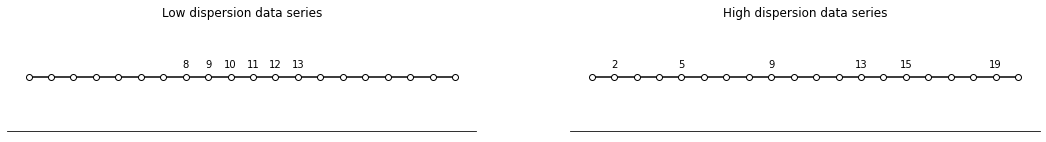

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generate sample data
points = [n for n in range(1,21)]
series = ['', '2', '', '', '5', '', '', '', '9', '', '', '', '13', '', '15', '', '', '', '19', '']
series2 = ['', '', '', '', '', '', '', '8', '9', '10', '11', '12', '13', '', '', '', '', '', '', '']

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(1, 2) #figsize=(8.8, 2), constrained_layout=True)
fig.set_size_inches(18.5, 2)

#######################################
### first chart: low dispersion series
ax[0].set(title="Low dispersion data series")

#ax.vlines(dates, 0, 5, color="tab:red")  # The vertical stems.
ax[0].plot(points, np.zeros_like(points), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, r in zip(points, series2):
    ax[0].annotate(r, xy=(d, 0.01), horizontalalignment="center")

# remove y axis and spines
ax[0].yaxis.set_visible(False)
ax[0].xaxis.set_visible(False)
ax[0].spines[["left", "top", "right"]].set_visible(False)

ax[0].margins(y=0.1)

#######################################
### second chart: high dispersion series
ax[1].set(title="High dispersion data series")

#ax.vlines(dates, 0, 5, color="tab:red")  # The vertical stems.
ax[1].plot(points, np.zeros_like(points), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, r in zip(points, series):
    ax[1].annotate(r, xy=(d, 0.01), horizontalalignment="center")

# remove y axis and spines
ax[1].yaxis.set_visible(False)
ax[1].xaxis.set_visible(False)
ax[1].spines[["left", "top", "right"]].set_visible(False)

ax[1].margins(y=0.1)
plt.show()

So why should we care about the dispersion of our data? Generally, summarising the dataset is key to understanding its composition, especially when the dataset is large.

>As we've seen in the previous section, the mode, mean and median summarise the data into a single value that is typical or representative of all the values in the dataset. Measures of spread summarise the data in a way that shows how scattered the values are and how much they differ from the mean value.

For example, if you calculate the mean of the two datasets above, you'll find that they are the same (10.5), but a quick look at their graphical representation should convince you that they have a different composition.

In [ ]:
lo = [8,9,10,11,12,13]
hi = [2,5,9,13,15,19]

In [ ]:
print('Mean of low dispersion data series:', np.mean(lo))
print('Mean of high dispersion data series:', np.mean(hi))

Mean of low dispersion data series: 10.5
Mean of high dispersion data series: 10.5


#### Range



The simplest measure of dispersion is the **range**, which tells us how far apart are the opposite extreme points in the dataset. It is calculated as the **difference between the highest and lowest values** in a list or data series:

In [ ]:
range_lo = max(lo) - min(lo)
range_hi = max(hi) - min(hi)

print('Range of low dispersion data series:', range_lo)
print('Range of high dispersion data series:', range_hi)

Range of low dispersion data series: 5
Range of high dispersion data series: 17


Of course, as you can imagine, this measure is also quite susceptible to the presence of extreme values or outliers and should be used with caution. A more robust alternative is the interquartile range (IQR), which we'll explore next.

*As an important side note, keep in mind that **extreme values and outliers are not the same thing**; check out the picture below for a quick reference or make sure to watch [this video](§https://www.youtube.com/watch?v=CktqqnZf6LI) for a more technical dissertation around Extreme Value Theory.*

<img src="img/extremes-outliers.jpeg" width="800">

#### Interquartile range

Before we can talk about **interquartile range (IQR)**, we should first mention what a **quartile** is. Just like the median is the value that divides a set of data between the lowest and highest halves, quartiles divide an ordered dataset into four equal parts. Specifically, they refer to the values of the point between the quarters.

<img src="img/quartiles.png" width="900">

*Note: a dataset may also be divided into quintiles (five equal parts) or deciles (ten equal parts) or percentiles (one hundred equal parts).*

In Python we can use numpy's `np.percentile()` function to divide our data in as many equal parts as we like. In order to calculate the quartiles, and thus divide our data in four equal parts (Q1, Q2 and Q3), we proceed as follows:

In [ ]:
np.percentile(lo, [25, 50, 75]).tolist()

[9.25, 10.5, 11.75]

In [ ]:
np.percentile(hi, [25, 50, 75]).tolist()

[6.0, 11.0, 14.5]

For the low dispersion dataset:

- Q1: the first quartile is 9.25
- Q2: the second quartile (the median) is 10.5
- Q3: the third quartile is 11.75

For the high dispersion dataset:

- Q1: the first quartile is 6.0
- Q2: the second quartile (the median) is 11.0
- Q3: the third quartile is 14.5

At this point we can introduce the concept of the **interquartile range (IQR)**, which is the difference between the upper (Q3) and lower (Q1) quartiles, and **describes the middle 50% of values** when ordered from lowest to highest. As we've seen before, the IQR is often seen as a better measure of dispersion than the range as it is not affected by extreme values or outliers.

Let's calculate the IQR for our two datasets:

In [ ]:
q1_lo, q3_lo = np.percentile(lo, [25, 75])
q1_lo, q3_lo

(9.25, 11.75)

In [ ]:
q1_hi, q3_hi = np.percentile(hi, [25, 75])
q1_hi, q3_hi

(6.0, 14.5)

In [ ]:
iqr_range_lo = q3_lo - q1_lo
iqr_range_hi = q3_hi - q1_hi

print('IQR of low dispersion data series:', iqr_range_lo)
print('IQR of high dispersion data series:', iqr_range_hi)

IQR of low dispersion data series: 2.5
IQR of high dispersion data series: 8.5


#### Variance and Standard Deviation

The variance and the standard deviation are **measures of dispersion of the data around the mean**. They summarise how close each observed data value is to the mean value.

Variance ($\sigma^2$) and standard deviation ($\sigma$) are directly related since the latter is the square root of the former. So, in order to calculate the standard deviation, we first need to compute the variance of our data.

Let's take our high dispersion dataset from before as an example. The variance of a series of data points is computed by looking at how far away each data point is from the mean value. The distances from each data point ($x$) and the overall mean ($\mu$) are referred to as **deviations from the mean**. Check out the figure below for a visual explanation:

<img src="img/variance-compute.png" width="900">

To **compute the variance** of these data point, we need to:

1. calculate all the deviations from the mean $(x-\mu)$ in the data set
2. square them
3. take their average

Now, although the last point may seem quite harmless, it hides an important point that needs to be cleared out. At the beginning of this document, we made a distinction between statisticians and data scientists, namely that the former estimate and the latter measure. As a direct consequence of this nuance, for a statistician there are two important cases to consider when calculating a measure such as the variance or the standard deviation (or the mean, for that matter):

- is the data we're observing representative of the entire **population**?
- or is it the result of a **sample** of a population?

Imagine that you are interested in studying the income variability in Italy and you take the two following approaches:

1. you take a census of the italian population and ask every single person their income
2. you identify a representative subset of the population and ask them their income

In the former case, you're studying your phenomena of interest with respect to its entire population, whereas in the latter case, your analysis will be limited to a sample of the actual population.

It won't come as a surprise the fact that there are two ways to compute a statistic such as the variance: one that references to data coming from a **population** ($\sigma^2$) and one for data coming from a **sample** ($s^2$).

Let's see the two formulas:

$$
    \sigma^2 = \frac{1}{N} \sum \limits_{i=1}^{N} (x_i - \mu)^2
$$

$$
    s^2 = \frac{1}{n-1} \sum \limits_{i=1}^{n} (x_i - \overline{x})^2
$$

The first main difference is notational:

- $\sigma^2$, $N$ and $\mu$ for the population
- $s^2$, $n$ and $\overline{x}$ for the sample

The second (and more important) difference lies in the denominator of the average:

- in the population formula we divide by the **total number of observations** ($N$)
- in the population formula we divide by the **total number of observations minus 1** ($n-1$)

This difference reflects the fact that in the latter case, we do not have information on the whole population, therefore we are more prone to make a mistake and thus we try to **account for this potential error** by making our estimate a little bit larger than what it actually is (but still close enough) by dividing by $n-1$

> *Note: this isn't all, the [full story](https://en.wikipedia.org/wiki/Bessel%27s_correction) involves degrees of freedom and unbiased estimators, but we don't need to worry about those for now.*

Again, statistitians estimate, data scientists measure.

The **standard deviation** is much easier to interpret than the variance since it is on the same scale as the original data and, since the standard deviation is the square root of the variance, it should be easy enough to derive its formula:

$$
    \sigma = \sqrt{ \frac{1}{N} \sum \limits_{i=1}^{N} (x_i - \mu)^2 }
$$

$$
    s = \sqrt{ \frac{1}{n-1} \sum \limits_{i=1}^{n} (x_i - \overline{x})^2 }
$$

So, to **compute the standard deviation** of a series of data points, we need to:

1. calculate all the deviations from the mean $(x-\mu)$ in the data set
2. square them
3. take their average (choosing between $n$ and $n-1$ as needed)
4. take the squared root of the result

Let's compute the standard deviation for both the high and low dispersion data series:

In [ ]:
print('High dispersion data:', hi)
hi_m = np.mean(hi)
print('High dispersion mean:', hi_m)

High dispersion data: [2, 5, 9, 13, 15, 19]
High dispersion mean: 10.5


In [ ]:
# 1. calculate all the deviations from the mean (𝑥−𝜇) in the data set
dev_hi = [(x - hi_m) for x in hi]
dev_hi

[-8.5, -5.5, -1.5, 2.5, 4.5, 8.5]

In [ ]:
# 2. square the deviations from the mean
sq_dev_hi = [el**2 for el in dev_hi]
sq_dev_hi

[72.25, 30.25, 2.25, 6.25, 20.25, 72.25]

In [ ]:
# 3. take their average (let's use the sampling version: 𝑛−1)
avg_sq_dev_hi = sum(sq_dev_hi)/(len(hi)-1)
avg_sq_dev_hi

40.7

In [ ]:
# 4. take the squared root of the result
stdev_hi = np.sqrt(avg_sq_dev_hi)
stdev_hi

6.3796551630946325

`numpy` has handy functions to calculate both the variance `np.var()` and the standard deviation `np.std()` of a series of values; just remember to set to 1 the parameter `ddof=1` (delta degrees of freedom) if you're interested in the sample statistic as opposed to the population one.

In [ ]:
np.var(hi, ddof=1)

40.7

In [ ]:
np.std(hi, ddof=1)

6.3796551630946325

### Final Recap

**Measures of Central Tendency**

A basic step in exploring and understanding your data is getting a *typical value* for each feature or variable of your dataset: an estimate of where most of the data is located, that is, its central tendency. Check out the summary table below and for further reading check out this [online book](https://openstax.org/books/introductory-statistics/pages/2-5-measures-of-the-center-of-the-data).

|  | Mode | Mean | Median |
| --- | :---: | :---: | :---: |
| **Definition** | Most common value </br > in the data | Sum of values divided </br > by count of values | Middle value in </br > the ordered data |
| **Is robust?** | Yes | No | Yes |
| **Function** | `stats.mode()` | `np.mean()` | `np.median()` |

**Measures of statistical dispersion**

Location is just one dimension in summarizing a feature. A second dimension, dispersion, measures whether the data values are relatively close to each other or spread out. Check out the summary table below and for further reading check out this [online book](https://openstax.org/books/introductory-statistics/pages/2-7-measures-of-the-spread-of-the-data).

|  | Range | Interquartile Range | Standard Deviation |
| --- | :---: | :---: | :---: |
| **Definition** | Max. minus Min. </br > values in the data | Central 50% of </br > the ordered data | Squared root of the average </br > squared deviations from the mean |
| **Is robust?** | No | Yes | No |
| **Function** | `max() - min()` | `stats.iqr()` | `np.std()` |